In [55]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
# import libraries
# 1 Data anlysis
import pandas as pd
import numpy as np
# 2.visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# 3.computer vision library
import cv2
# import glob
from glob import glob 

In [57]:
# extract path of male and female in crop_data folder and put them in list
fpath = glob('./crop_data/female/*.jpg')
mpath= glob('./crop_data/males/*.jpg')

In [58]:
df_female =pd.DataFrame(fpath,columns=['filepath'])
df_female['gender']='female'

df_male =pd.DataFrame(mpath,columns=['filepath'])
df_male['gender']='male'

df =pd.concat((df_female,df_male),axis=0)

df.head()

,filepath,gender
0,./crop_data/female\female_000000.jpg,female
1,./crop_data/female\female_000001.jpg,female
2,./crop_data/female\female_000002.jpg,female
3,./crop_data/female\female_000003.jpg,female
4,./crop_data/female\female_000004.jpg,female


In [59]:
df.tail()

,filepath,gender
2034,./crop_data/males\male_004745.jpg,male
2035,./crop_data/males\male_004753.jpg,male
2036,./crop_data/males\male_004755.jpg,male
2037,./crop_data/males\male_004756.jpg,male
2038,./crop_data/males\male_004757.jpg,male


In [60]:
df.shape

(4743, 2)

In [61]:
# it will take each image path
# then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]


In [62]:
# Store dimension of image in this column 
df['dimension'] =df['filepath'].apply(get_size)

In [63]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_000000.jpg,female,122
1,./crop_data/female\female_000001.jpg,female,182
2,./crop_data/female\female_000002.jpg,female,273
3,./crop_data/female\female_000003.jpg,female,81
4,./crop_data/female\female_000004.jpg,female,122


In [64]:

dist_gender = df['gender'].value_counts()
dist_gender

gender
female    2704
male      2039
Name: count, dtype: int64

<Axes: ylabel='count'>

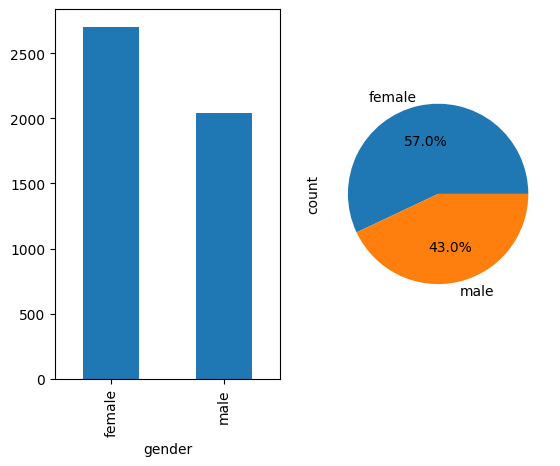

In [65]:

fig,ax =plt.subplots(nrows=1,ncols=2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%1.1f%%')

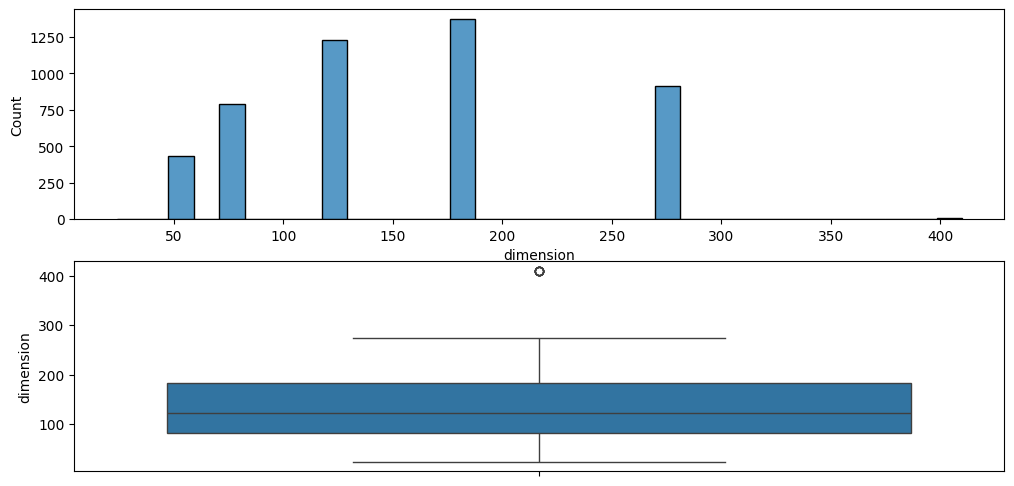

In [66]:
# what distribution of size of all image
# Histogram
# Box plot
# split by "Gender"
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

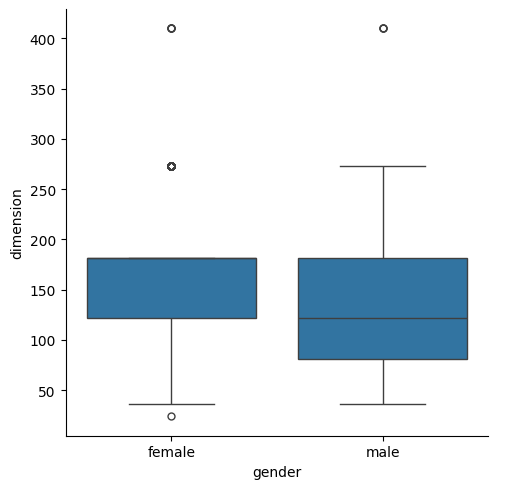

In [67]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

In [68]:
# we have almost equal distributio of gender (numbers)
# most of the images are having dimenstion more than 60
# femal most of the femal images are HD compare to male images

# consider the images width dimenisons more than 60 and resie all the images into 100 x100


In [69]:
df_filter = df.query('dimension>60')
 

In [70]:
df_filter.shape

(4308, 3)

In [71]:
def structuring(path):
    try:
        # step -1 : read image

        img = cv2.imread(path)
        # step -2 : resize image
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3 : resize image into 100x100 array
        size= gray.shape[0]
        if size>=100:
            gray_resize =cv2.resize(gray,(100,100),cv2.INTER_AREA)
        # cv2.Inter_cubic (enlarge)
        else:
            gray_resize =cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        # step -4 : flatten image (1x10000)
        flatten_img =gray_resize.flatten()
        return flatten_img
    except:
            return None 

In [72]:
# Conver all images into 100x100 
df_filter['data']=df_filter['filepath'].apply(structuring) 
df_filter.head()


C:\Users\Daniel\AppData\Local\Temp\ipykernel_10576\3455525932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['data']=df_filter['filepath'].apply(structuring)


,filepath,gender,dimension,data
0,./crop_data/female\female_000000.jpg,female,122,"[54, 60, 54, 58, 59, 54, 55, 60, 55, 45, 46, 5..."
1,./crop_data/female\female_000001.jpg,female,182,"[32, 23, 31, 27, 28, 30, 28, 33, 36, 30, 46, 8..."
2,./crop_data/female\female_000002.jpg,female,273,"[17, 17, 19, 22, 19, 20, 25, 22, 26, 29, 39, 5..."
3,./crop_data/female\female_000003.jpg,female,81,"[23, 28, 32, 30, 24, 21, 22, 25, 28, 28, 23, 2..."
4,./crop_data/female\female_000004.jpg,female,122,"[12, 11, 13, 14, 16, 23, 20, 29, 40, 42, 38, 3..."


In [73]:
data =df_filter['data'].apply(pd.Series)

In [74]:
data.columns = [f"pixels_{i}" for i in data.columns]
data.head()

,pixels_0,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_9990,pixels_9991,pixels_9992,pixels_9993,pixels_9994,pixels_9995,pixels_9996,pixels_9997,pixels_9998,pixels_9999
0,54,60,54,58,59,54,55,60,55,45,...,30,28,33,40,49,58,52,43,40,35
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,17,17,19,22,19,20,25,22,26,29,...,195,193,194,195,195,195,193,194,194,195
3,23,28,32,30,24,21,22,25,28,28,...,5,14,18,13,1,3,20,31,32,23
4,12,11,13,14,16,23,20,29,40,42,...,171,188,202,209,219,213,221,214,163,136


In [75]:
# data normalizations
data =data/255
data.head()

,pixels_0,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_9990,pixels_9991,pixels_9992,pixels_9993,pixels_9994,pixels_9995,pixels_9996,pixels_9997,pixels_9998,pixels_9999
0,0.211765,0.235294,0.211765,0.227451,0.231373,0.211765,0.215686,0.235294,0.215686,0.176471,...,0.117647,0.109804,0.129412,0.156863,0.192157,0.227451,0.203922,0.168627,0.156863,0.137255
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.227451,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588
2,0.066667,0.066667,0.074510,0.086275,0.074510,0.078431,0.098039,0.086275,0.101961,0.113725,...,0.764706,0.756863,0.760784,0.764706,0.764706,0.764706,0.756863,0.760784,0.760784,0.764706
3,0.090196,0.109804,0.125490,0.117647,0.094118,0.082353,0.086275,0.098039,0.109804,0.109804,...,0.019608,0.054902,0.070588,0.050980,0.003922,0.011765,0.078431,0.121569,0.125490,0.090196
4,0.047059,0.043137,0.050980,0.054902,0.062745,0.090196,0.078431,0.113725,0.156863,0.164706,...,0.670588,0.737255,0.792157,0.819608,0.858824,0.835294,0.866667,0.839216,0.639216,0.533333


In [76]:
data['gender']=df_filter['gender']
data.head()

,pixels_0,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_9991,pixels_9992,pixels_9993,pixels_9994,pixels_9995,pixels_9996,pixels_9997,pixels_9998,pixels_9999,gender
0,0.211765,0.235294,0.211765,0.227451,0.231373,0.211765,0.215686,0.235294,0.215686,0.176471,...,0.109804,0.129412,0.156863,0.192157,0.227451,0.203922,0.168627,0.156863,0.137255,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.066667,0.066667,0.074510,0.086275,0.074510,0.078431,0.098039,0.086275,0.101961,0.113725,...,0.756863,0.760784,0.764706,0.764706,0.764706,0.756863,0.760784,0.760784,0.764706,female
3,0.090196,0.109804,0.125490,0.117647,0.094118,0.082353,0.086275,0.098039,0.109804,0.109804,...,0.054902,0.070588,0.050980,0.003922,0.011765,0.078431,0.121569,0.125490,0.090196,female
4,0.047059,0.043137,0.050980,0.054902,0.062745,0.090196,0.078431,0.113725,0.156863,0.164706,...,0.737255,0.792157,0.819608,0.858824,0.835294,0.866667,0.839216,0.639216,0.533333,female


In [77]:
data.isnull().sum()

pixels_0       0
pixels_1       0
pixels_2       0
pixels_3       0
pixels_4       0
              ..
pixels_9996    0
pixels_9997    0
pixels_9998    0
pixels_9999    0
gender         0
Length: 10001, dtype: int64

In [78]:
# re,pve tje ,ssomg va;ies
data.dropna(inplace=True)

In [79]:
data.shape

(4308, 10001)

In [83]:
# save the data fro future use
import pickle
pickle.dump(data,open('./data/data_images_100_100.pickle',mode='wb')) 

: 

In [ ]:
# Feature Extraction with eigen face
